In [22]:
# Imports
import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

In [8]:
with open("data/H2O_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian = pickle.load(f)

In [ ]:
num_qubits = hamiltonian.num_qubits
res_normal = {"times":[], "iters": [], "energies": []}
res_all_layers = {"times":[], "iters": [], "energies": []}
res_all_layers_rev = {"times":[], "iters": [], "energies": []}
res_some_layers = {"times":[], "iters": [], "energies": []}
res_some_layers_rev = {"times":[], "iters": [], "energies": []}
res_adding_layers = {"times":[], "iters": [], "energies": []}
res_adding_layers_rev = {"times":[], "iters": [], "energies": []}
for num_layers in range(1,11):
    #cf.expand_observable(hamiltonian, num_qubits)
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    res_normal["times"].append(t1-t0)
    res_normal["iters"].append(optimization_normal["iters"])
    res_normal["energies"].append(optimization_normal["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers)
    t1 = time.time()
    res_all_layers["times"].append(t1-t0)
    res_all_layers["iters"].append(optimization_all_layers["iters"])
    res_all_layers["energies"].append(optimization_all_layers["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers, "backward")
    t1 = time.time()
    res_all_layers_rev["times"].append(t1-t0)
    res_all_layers_rev["iters"].append(optimization_all_layers_rev["iters"])
    res_all_layers_rev["energies"].append(optimization_all_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
    t1 = time.time()
    res_some_layers["times"].append(t1-t0)
    res_some_layers["iters"].append(optimization_some_layers["iters"])
    res_some_layers["energies"].append(optimization_some_layers["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1, "backward")
    t1 = time.time()
    res_some_layers_rev["times"].append(t1-t0)
    res_some_layers_rev["iters"].append(optimization_some_layers_rev["iters"])
    res_some_layers_rev["energies"].append(optimization_some_layers_rev["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers)
    t1 = time.time()
    res_adding_layers["times"].append(t1-t0)
    res_adding_layers["iters"].append(optimization_adding_layers["iters"])
    res_adding_layers["energies"].append(optimization_adding_layers["cost_history"][-1])
    t0 = time.time()
    optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers, direction= "backward")
    t1 = time.time()
    res_adding_layers_rev["times"].append(t1-t0)
    res_adding_layers_rev["iters"].append(optimization_adding_layers_rev["iters"])
    res_adding_layers_rev["energies"].append(optimization_adding_layers_rev["cost_history"][-1])

[]

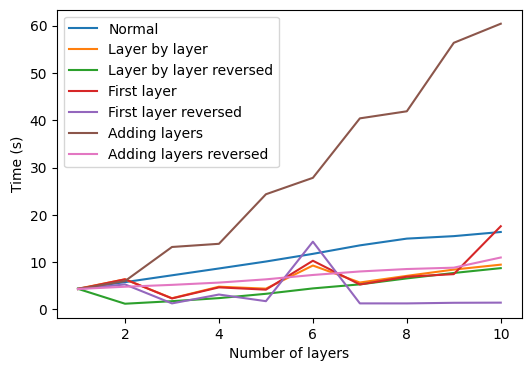

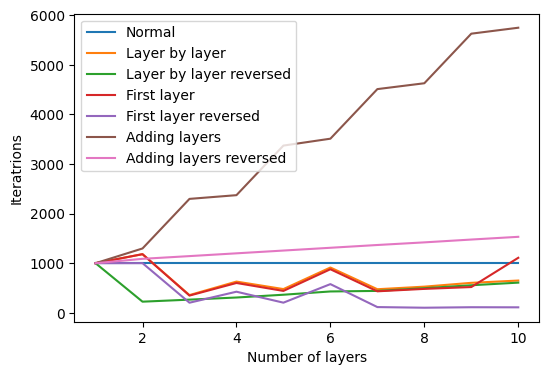

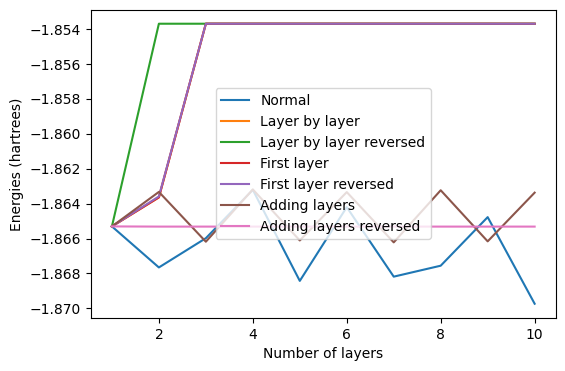

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["times"], label='Normal')
plt.plot(range(1,11), res_all_layers["times"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["times"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["times"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["times"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["times"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["times"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Time (s)')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["iters"], label='Normal')
plt.plot(range(1,11), res_all_layers["iters"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["iters"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["iters"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["iters"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["iters"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["iters"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Iteratrions')
plt.legend()
plt.plot()

plt.figure(figsize=(6, 4))
plt.plot(range(1,11), res_normal["energies"], label='Normal')
plt.plot(range(1,11), res_all_layers["energies"], label='Layer by layer')
plt.plot(range(1,11), res_all_layers_rev["energies"], label='Layer by layer reversed')
plt.plot(range(1,11), res_some_layers["energies"], label='First layer')
plt.plot(range(1,11), res_some_layers_rev["energies"], label='First layer reversed')
plt.plot(range(1,11), res_adding_layers["energies"], label='Adding layers')
plt.plot(range(1,11), res_adding_layers_rev["energies"], label='Adding layers reversed')
plt.xlabel('Number of layers')
plt.ylabel('Energies (hartrees)')
plt.legend()
plt.plot()

In [3]:
res_normal=[]
res_some_layers=[]
res_some_layers_rev=[]
res_adding_layers_rev=[]
for num_qubits in range(hamiltonian.num_qubits, 11):
    hamiltonian=cf.expand_observable(hamiltonian, num_qubits)
    res_normal.append({"times":[], "iters": [], "energies": []})
    res_some_layers.append({"times":[], "iters": [], "energies": []})
    res_some_layers_rev.append({"times":[], "iters": [], "energies": []})
    res_adding_layers_rev.append({"times":[], "iters": [], "energies": []})
    for num_layers in range(1,11):
        ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
        t0 = time.time()
        optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
        t1 = time.time()
        res_normal[num_qubits-4]["times"].append(t1-t0)
        res_normal[num_qubits-4]["iters"].append(optimization_normal["iters"])
        res_normal[num_qubits-4]["energies"].append(optimization_normal["cost_history"][-1])
        t0 = time.time()
        optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
        t1 = time.time()
        res_some_layers[num_qubits-4]["times"].append(t1-t0)
        res_some_layers[num_qubits-4]["iters"].append(optimization_some_layers["iters"])
        res_some_layers[num_qubits-4]["energies"].append(optimization_some_layers["cost_history"][-1])
        t0 = time.time()
        optimization_some_layers_rev=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1, "backward")
        t1 = time.time()
        res_some_layers_rev[num_qubits-4]["times"].append(t1-t0)
        res_some_layers_rev[num_qubits-4]["iters"].append(optimization_some_layers_rev["iters"])
        res_some_layers_rev[num_qubits-4]["energies"].append(optimization_some_layers_rev["cost_history"][-1])
        t0 = time.time()
        optimization_adding_layers_rev=mit.VQE_minimization_layer_adding_training(anz.build_Nlocal_ansatz, hamiltonian, num_qubits, num_layers, direction= "backward")
        t1 = time.time()
        res_adding_layers_rev[num_qubits-4]["times"].append(t1-t0)
        res_adding_layers_rev[num_qubits-4]["iters"].append(optimization_adding_layers_rev["iters"])
        res_adding_layers_rev[num_qubits-4]["energies"].append(optimization_adding_layers_rev["cost_history"][-1])

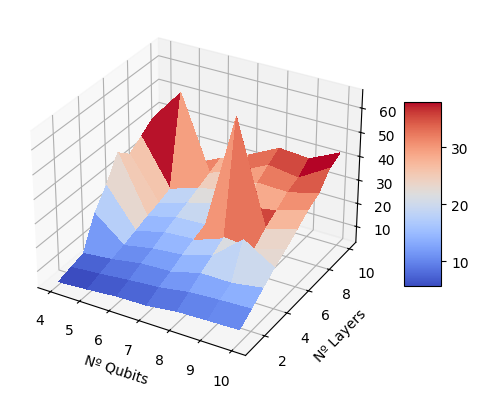

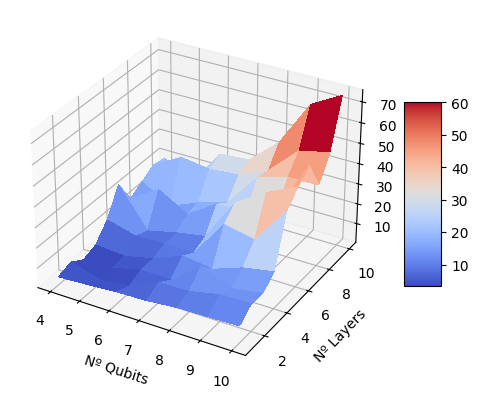

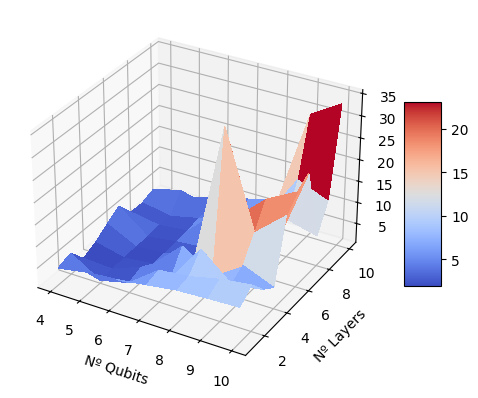

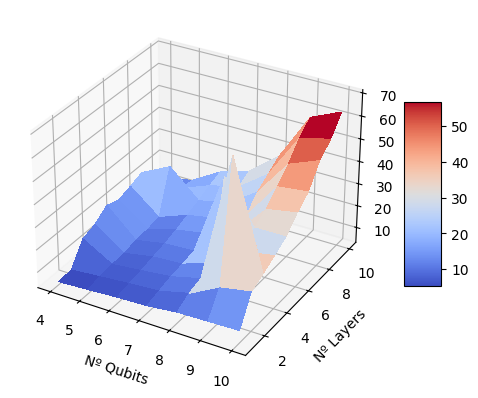

In [31]:
X = range(4,11)
Y = range(1,11)
Z = np.zeros((len(Y), len(X)))

# Vectors for grid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(len(X)):
    for j in range(len(Y)):
        Z[j,i] = res_normal[i]["times"][j]
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Nº Qubits')
plt.ylabel('Nº Layers')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

X = range(4,11)
Y = range(1,11)
Z = np.zeros((len(Y), len(X)))

# Vectors for grid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(len(X)):
    for j in range(len(Y)):
        Z[j,i] = res_some_layers[i]["times"][j]
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Nº Qubits')
plt.ylabel('Nº Layers')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

X = range(4,11)
Y = range(1,11)
Z = np.zeros((len(Y), len(X)))

# Vectors for grid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(len(X)):
    for j in range(len(Y)):
        Z[j,i] = res_some_layers_rev[i]["times"][j]
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Nº Qubits')
plt.ylabel('Nº Layers')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

X = range(4,11)
Y = range(1,11)
Z = np.zeros((len(Y), len(X)))

# Vectors for grid
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
for i in range(len(X)):
    for j in range(len(Y)):
        Z[j,i] = res_adding_layers_rev[i]["times"][j]
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Nº Qubits')
plt.ylabel('Nº Layers')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()